### Determination of π

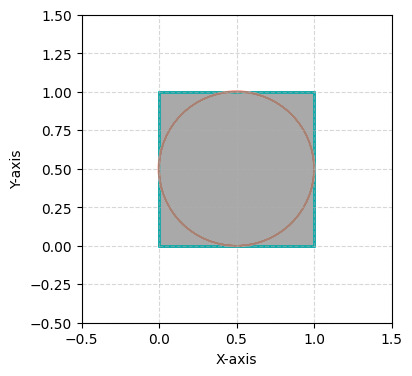

3.1412752


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


# Part 1 : Creation of Random points in a square of size 1

num_points = int(input("Sample Size of the desired Monte Carlo simulation "))
points_x = np.random.uniform(0, 1, num_points)
points_y = np.random.uniform(0, 1, num_points)

# Create figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Set limits from 0 to 1 for both axes
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# Draw a square from (0,0) to (1,1)
square = plt.Rectangle((0, 0), 1, 1, fill=None, edgecolor='darkturquoise', linewidth=2)
circle = plt.Circle((0.5, 0.5), 0.5,fill=None, edgecolor='salmon', linewidth=2)
ax.add_patch(square)
ax.add_patch(circle)

# Labels and grid
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Which size to use for a point on the graph ?
# With 1000 points and s=0.1, it is very clear so we want to keep num_points*s = 100
ax.scatter(points_x, points_y, color='darkgrey', s=100/num_points)
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

nb_points_inside = 0
for point in range(num_points) :
    if math.sqrt((points_x[point]-0.5)**2+(points_y[point]-0.5)**2)<0.5 :
        nb_points_inside+= 1

pi = 4*nb_points_inside/num_points

print(pi)

### Determination of $\sqrt{2}$

Number of points inside the triangle: 2358
Total points picked: 7818
Estimated value of sqrt(2): 1.421311488327846


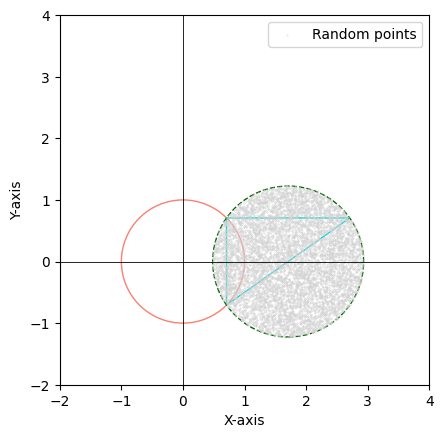

In [48]:
import math
import random
import matplotlib.pyplot as plt

# Part 1: Build the circle centered in O with radius 1 in salmon color
def plot_circle():
    fig, ax = plt.subplots()
    circle = plt.Circle((0, 0), 1, color='salmon', fill=False, alpha=1)
    ax.add_artist(circle)

    # Show grid and axes labels
    ax.set_xlabel('X-axis')  # Label for x-axis
    ax.set_ylabel('Y-axis')  # Label for y-axis
    
    # Display the axes
    ax.axhline(0, color='black',linewidth=0.6)  # Add horizontal axis (y=0 line)
    ax.axvline(0, color='black',linewidth=0.6)  # Add vertical axis (x=0 line)
    
    # Set the limits and aspect ratio to make sure the circle is properly displayed
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)
    ax.set_aspect('equal', 'box')
    return ax

# Part 2: Build the triangle defined by the points A, B, and C
def plot_triangle(ax):
    # Points of the triangle
    A_x = math.cos(math.radians(45))
    A_y = math.sin(math.radians(45))

    B_x = math.cos(math.radians(45))
    B_y = - math.sin(math.radians(45))

    C_x = A_x + 2
    C_y = A_x

    # Triangle vertices
    A = (A_x, A_y)
    B = (B_x, B_y)
    C = (C_x, C_y)

    triangle = plt.Polygon([A, B, C], closed=True, fill=None, edgecolor='darkturquoise')
    ax.add_artist(triangle)

    return A, B, C

# Part 3: Build the circle of diameter BC in green dots
def plot_circle_bc(ax, B, C):
    # Calculate the center and radius of the circle from B and C
    center_x = (B[0] + C[0]) / 2
    center_y = (B[1] + C[1]) / 2
    radius = math.dist(B, C) / 2

    circle_bc = plt.Circle((center_x, center_y), radius, color='darkgreen', fill=False, linestyle='dashed')
    ax.add_artist(circle_bc)

    return center_x, center_y, radius

# Part 4: Randomly pick points from this circle using the Monte Carlo method
def monte_carlo_points(center_x, center_y, radius, n_points):
    points = []
    for _ in range(n_points):
        # Generate random points within the square that bounds the circle
        x = random.uniform(center_x - radius, center_x + radius)
        y = random.uniform(center_y - radius, center_y + radius)
        
        # Check if the point is inside the circle
        if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
            points.append((x, y))
    return points

# Part 5: Count the number of points inside the triangle vs total points picked
def count_points_inside_triangle(points, A, B, C):
    def is_inside_triangle(p, A, B, C):
        def sign(p1, p2, p3):
            return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])
        
        d1 = sign(p, A, B)
        d2 = sign(p, B, C)
        d3 = sign(p, C, A)
        
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        
        return not (has_neg and has_pos)
    
    inside = 0
    for p in points:
        if is_inside_triangle(p, A, B, C):
            inside += 1
    return inside, len(points)

# Main function to run the task
def main():
    n_points = int(input("Enter the number of points to pick: "))
    ax = plot_circle()
    A, B, C = plot_triangle(ax)
    center_x, center_y, radius = plot_circle_bc(ax, B, C)
    
    # Pick random points from the circle
    points = monte_carlo_points(center_x, center_y, radius, n_points)
    
    # Count the points inside the triangle
    inside, total = count_points_inside_triangle(points, A, B, C)
    
    # Estimate sqrt(2)
    estimated_sqrt_2 = ((B_x - C_x)**2 + (B_y - C_y)**2) * inside * math.pi / (total * 4)
    
    print(f"Number of points inside the triangle: {inside}")
    print(f"Total points picked: {total}")
    print(f"Estimated value of sqrt(2): {estimated_sqrt_2}")
    
    # Show the plot with the circle, triangle, and random points
    random_points_x = [p[0] for p in points]
    random_points_y = [p[1] for p in points]
    ax.scatter(random_points_x, random_points_y, color='lightgrey', s=0.1, label='Random points')
    
    plt.legend()
    plt.show()

# Run the program
main()